In [2]:
import scanpy as sc
import scvi
import warnings
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
sc.set_figure_params(figsize=(4, 4))
import numpy as np
import torch
from functions import *
import anndata
%matplotlib inline  

In [7]:
adata = anndata.read_h5ad(filename="data/adataLung4.h5ad")
scvi.model.SCVI.setup_anndata(adata, layer="counts")
adata

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


AnnData object with n_obs × n_vars = 32472 × 4000
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'Scanorama', 'Unintegrated', 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [9]:
vaeSD = scvi.model.SCVI(adata,prior_distribution="sdnormal",n_latent=128)
vaeSD.train(max_epochs=100)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [02:40<00:00,  1.55s/it, v_num=1, train_loss_step=940, train_loss_epoch=894]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [02:40<00:00,  1.60s/it, v_num=1, train_loss_step=940, train_loss_epoch=894]


128


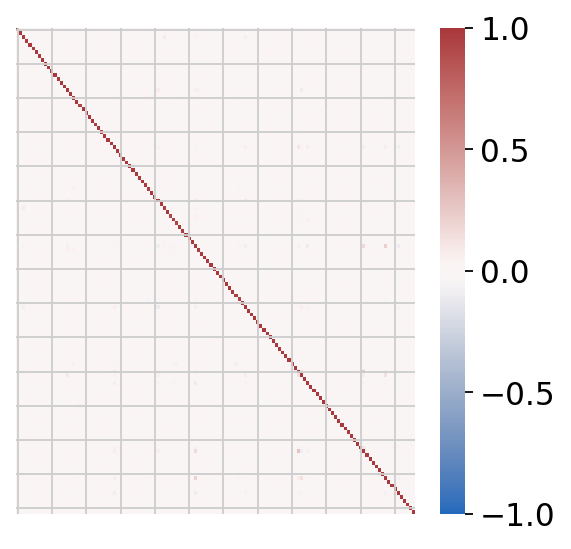

In [10]:
_, numSD = activateUnits(adata, vaeSD)
print(numSD)
plotcovarianceMatrix(adata, vaeSD)

In [11]:
vaeMG = scvi.model.SCVI(adata,prior_distribution="mixofgaus",n_latent=128)
vaeMG.train(max_epochs=100)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [03:07<00:00,  1.83s/it, v_num=1, train_loss_step=982, train_loss_epoch=893]    

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [03:07<00:00,  1.88s/it, v_num=1, train_loss_step=982, train_loss_epoch=893]


128


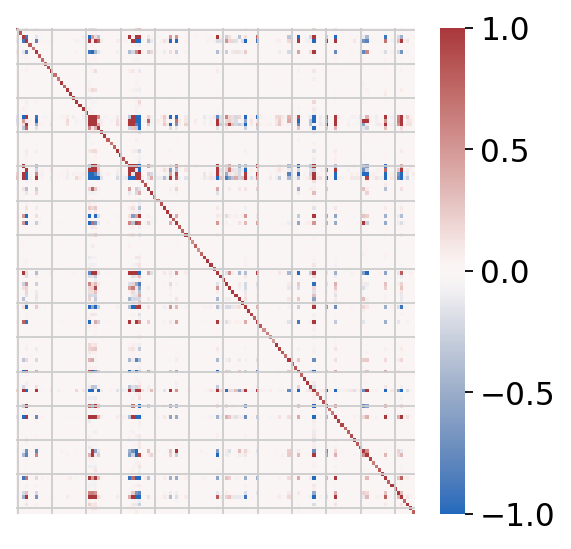

In [12]:
_, numMG = activateUnits(adata, vaeMG)
print(numMG)
plotcovarianceMatrix(adata, vaeMG)

In [13]:
vaeVP = scvi.model.SCVI(adata,prior_distribution="vamp",n_latent=128)
vaeVP.train(max_epochs=100)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [03:25<00:00,  2.08s/it, v_num=1, train_loss_step=876, train_loss_epoch=889]    

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [03:25<00:00,  2.06s/it, v_num=1, train_loss_step=876, train_loss_epoch=889]


128


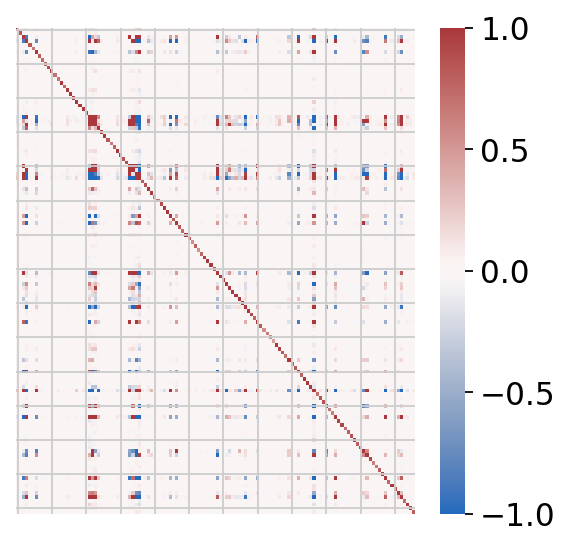

In [14]:
_, numMG = activateUnits(adata, vaeMG)
print(numMG)
plotcovarianceMatrix(adata, vaeMG)

In [16]:
vaeNF = scvi.model.SCVI(adata,prior_distribution="normalflow",n_latent=128)
vaeNF.train(max_epochs=50)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [06:54<00:00,  8.30s/it, v_num=1, train_loss_step=871, train_loss_epoch=883]      

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [06:54<00:00,  8.29s/it, v_num=1, train_loss_step=871, train_loss_epoch=883]


128


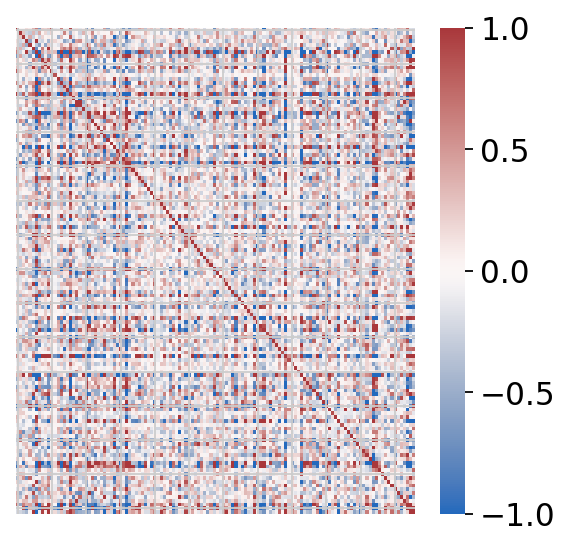

In [17]:
_, numNF = activateUnits(adata, vaeNF)
print(numNF)
plotcovarianceMatrix(adata, vaeNF)